#Exercise 1: Weather model

**1.1** First, load the dataset from the weatherinszeged table from Thinkful's database.

**1.2** Like in the previous checkpoint, build a linear regression model where your target variable is the difference between the apparenttemperature and the temperature. As explanatory variables, use humidity and windspeed. Now, estimate your model using OLS. What are the R-squared and adjusted R-squared values? Do you think they are satisfactory? Why?

**1.3** Next, include the interaction of humidity and windspeed to the model above and estimate the model using OLS. Now, what is the R-squared of this model? Does this model improve upon the previous one?

**1.4** Add visibility as an additional explanatory variable to the first model and estimate it. Did R-squared increase? What about adjusted R-squared? Compare the differences put on the table by the interaction term and the visibility in terms of the improvement in the adjusted R-squared. Which one is more useful?

**1.5** Choose the best one from the three models above with respect to their AIC and BIC scores. Validate your choice by discussing your justification with your mentor.

* **1.1 First, load the dataset from the weatherinszeged table from Thinkful's database.**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sqlalchemy import create_engine


import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
weather_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

weather_df.head()


,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


* **1.2 Like in the previous checkpoint, build a linear regression model where your target variable is the difference between the apparenttemperature and the temperature. As explanatory variables, use humidity and windspeed. Now, estimate your model using OLS. What are the R-squared and adjusted R-squared values? Do you think they are satisfactory? Why?**

In [3]:
# Y is the target variable
Y = weather_df['apparenttemperature'] - weather_df['temperature']
# X is the feature set
X = weather_df[['humidity','windspeed']]

# add a constant to the features
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        05:10:59   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4381      0.021    115.948      0.000       2.397       2.479
humidity      -3.0292      0.024   -126.479      0.000      -3.076      -2.982
windspeed     -0.1193      0.001   -176.164      0.000      -0.121      -0.118
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                          -0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R-squared** and **adjusted R-squared** is not satisfactory at 0.288, both are low and therefore explain little variance in the model.

* **1.2 Next, include the interaction of humidity and windspeed to the model above and estimate the model using OLS. Now, what is the R-squared of this model? Does this model improve upon the previous one?**

In [4]:
weather_df['humidity_windspeed_interaction'] = weather_df.humidity * weather_df.windspeed

Y = weather_df['apparenttemperature'] - weather_df['temperature'] 

X = weather_df[['humidity', 'windspeed', 'humidity_windspeed_interaction']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        05:10:59   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.0839      0.033      2.511      0.012       0.018       0.149
humidity                           0.1775      0.043      4.133      0.000       0.093       0.262
windspeed                          0.0905      0.002     36.797      0.000       0.086       0.095
humidity_windspeed_interaction    -0.2971      0.003    -88.470      0.000      -0.304      -0.291
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                          -0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Now, what is the R-squared of this model? Does this model improve upon the previous one?**

**R-squared** and **adjusted R-squared** are higher, meaning this model did improve on the previous one.

* **1.3 Add visibility as an additional explanatory variable to the first model and estimate it. Did R-squared increase? What about adjusted R-squared? Compare the differences put on the table by the interaction term and the visibility in terms of the improvement in the adjusted R-squared. Which one is more useful?**

In [5]:
# Y is the target variable
Y = weather_df['apparenttemperature'] - weather_df['temperature']
# X is the feature set
X = weather_df[['humidity','windspeed', 'visibility']]

# add a constant to the features
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                 1.401e+04
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        05:10:59   Log-Likelihood:            -1.6938e+05
No. Observations:               96453   AIC:                         3.388e+05
Df Residuals:                   96449   BIC:                         3.388e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5756      0.028     56.605      0.000       1.521       1.630
humidity      -2.6066      0.025   -102.784      0.000      -2.656      -2.557
windspeed     -0.1199      0.001   -179.014      0.000      -0.121      -0.119
visibility     0.0540      0.001     46.614      0.000       0.052       0.056
==============================================================================
Omnibus:                     3833.895   Durbin-Watson:                   0.282
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4584.022
Skew:                          -0.459   Prob(JB):                         0.00
Kurtosis:                       3.545   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Did R-squared increase? What about adjusted R-squared?**

Both increased over the first model, but decreased compared to the second.

**Compare the differences put on the table by the interaction term and the visibility in terms of the improvement in the adjusted R-squared. Which one is more useful?**

The interaction term did better in explaining model variance; while the visibility did enhance R2 by 0.02, the interaction term improved R2 by 0.06.

* **1.4 Choose the best one from the three models above with respect to their AIC and BIC scores. Validate your choice by discussing your justification with your mentor.**

Even with respect to AIC and BIC, the second model performs best. It has the lowest values of AIC and BIC in all of the three models, though not significantly better.

# Exercise 2: House prices model

**2.1** Load the houseprices data from Thinkful's database.

**2.2** Run your house prices model again and assess the goodness of fit of your model using F-test, R-squared, adjusted R-squared, AIC and BIC.

**2.3** Do you think your model is satisfactory? If so, why?

**2.4** In order to improve the goodness of fit of your model, try different model specifications by adding or removing some variables.

**2.5** For each model you try, get the goodness of fit metrics and compare your models with each other. Which model is the best and why?

* **2.1 Load the houseprices data from Thinkful's database.**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [7]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_prices_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

* **2.2 Run your house prices model again and assess the goodness of fit of your model using F-test, R-squared, adjusted R-squared, AIC and BIC.**

##Model 1

In [8]:
# Y is the target variable
Y = house_prices_df['saleprice']

# X is the feature set

# Let's add renovperiod instead of yearremodadd and yearbuilt
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'yearremodadd', 'yearbuilt']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     700.3
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        05:11:00   Log-Likelihood:                -17466.
No. Observations:                1460   AIC:                         3.495e+04
Df Residuals:                    1452   BIC:                         3.499e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -1.06e+06   1.22e+05     -8.705      0.000    -1.3e+06   -8.21e+05
overallqual   1.916e+04   1185.187     16.170      0.000    1.68e+04    2.15e+04
grlivarea       50.0491      2.554     19.598      0.000      45.040      55.059
garagecars    9793.4571   3029.048      3.233      0.001    3851.679    1.57e+04
garagearea      19.4099     10.249      1.894      0.058      -0.695      39.515
totalbsmtsf     29.7000      2.874     10.333      0.000      24.062      35.338
yearremodadd   278.0744     63.483      4.380      0.000     153.546     402.602
yearbuilt      222.1412     47.985      4.629      0.000     128.013     316.269
==============================================================================
Omnibus:                      460.314   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54609.883
Skew:                          -0.338   Prob(JB):                         0.00
Kurtosis:                      32.954   Cond. No.                     4.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Do you think your model is satisfactory? If so, why? In order to improve the goodness of fit of your model, try different model specifications by adding or removing some variables. For each model you try, get the goodness of fit metrics and compare your models with each other. Which model is the best and why?**


The f-statistic is 700.3 witha p-value of 0, meaning that our model does add to an empty model.

R-squared and Adjusted R-squared are relatively useful, explaining about 77% of variance in the data by the model.

The difference between AIC and BIC says that the model may have had overfitting, because the BIC value is higher which means it may have penalized the model for excessive features.

This gives the hint that additional feature engineering may be needed:

##Model 2



This model will consider the period between year built and renovation year:

In [9]:
house_prices_df['renovperiod'] = house_prices_df.yearremodadd - house_prices_df.yearbuilt

# Y is the target variable
Y = house_prices_df['saleprice']

# X is the feature set

# Let's add renovperiod instead of yearremodadd and yearbuilt
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'renovperiod']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     773.7
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        05:11:00   Log-Likelihood:                -17497.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1453   BIC:                         3.505e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.618e+04   4914.597    -19.571      0.000   -1.06e+05   -8.65e+04
overallqual   2.34e+04   1079.694     21.676      0.000    2.13e+04    2.55e+04
grlivarea      46.4634      2.566     18.106      0.000      41.429      51.497
garagecars   1.381e+04   3049.177      4.528      0.000    7825.057    1.98e+04
garagearea     17.1455     10.461      1.639      0.101      -3.374      37.665
totalbsmtsf    30.7628      2.932     10.493      0.000      25.012      36.514
renovperiod   -80.3766     45.459     -1.768      0.077    -169.549       8.796
==============================================================================
Omnibus:                      440.159   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41271.525
Skew:                          -0.344   Prob(JB):                         0.00
Kurtosis:                      29.038   Cond. No.                     9.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

By removing year built and year renovated and adding the difference in between, R-squared, Adjusted R-squaredare lower, while AIC, BIC and  F-statistic are higher. 

This model is not better than the first one. Still, we may can do some more feature engineering for this model. Let's take a look at its confusion matrix:

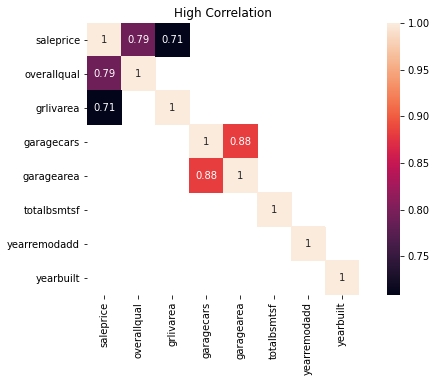

In [10]:
house_prices_df1 = house_prices_df[['saleprice', 'overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'yearremodadd', 'yearbuilt']]

num_corr = house_prices_df1.corr()
corr = num_corr[num_corr > .7]

plt.figure(figsize=(10,5))
plt.title('High Correlation')
sns.heatmap(corr ,square=True, annot=True)

##Model 3


We see that garagecars and garagearea are strongly correlated and therefore one of them should be removed. Let's try to combine them and see whether that can help our model:

In [11]:
house_prices_df['areapercar'] = house_prices_df.garagearea / house_prices_df.garagecars

house_prices_df['areapercar'] = house_prices_df.areapercar.apply(np.nan_to_num)

# Y is the target variable
Y = house_prices_df['saleprice']

# X is the feature set

# Let's add renovperiod instead of yearremodadd and yearbuilt
X = house_prices_df[['overallqual', 'grlivarea', 'areapercar', 'totalbsmtsf', 'yearremodadd', 'yearbuilt']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     772.2
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        05:11:01   Log-Likelihood:                -17498.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1453   BIC:                         3.505e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.299e+06   1.21e+05    -10.743      0.000   -1.54e+06   -1.06e+06
overallqual   2.088e+04   1188.978     17.561      0.000    1.85e+04    2.32e+04
grlivarea       54.9200      2.536     21.657      0.000      49.946      59.894
areapercar      15.2361     11.863      1.284      0.199      -8.034      38.507
totalbsmtsf     32.2710      2.882     11.199      0.000      26.618      37.924
yearremodadd   290.9937     65.120      4.469      0.000     163.254     418.734
yearbuilt      331.7965     46.858      7.081      0.000     239.880     423.713
==============================================================================
Omnibus:                      526.448   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63100.491
Skew:                          -0.627   Prob(JB):                         0.00
Kurtosis:                      35.182   Cond. No.                     4.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

That did not help the model. We will remove areapercar

##Model 4

Lets try remove garagearea and keep garagecars in other words try one feature less than the original Model 1


In [12]:
# Y is the target variable
Y = house_prices_df['saleprice']

# X is the feature set

# Let's add renovperiod instead of yearremodadd and yearbuilt
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'yearremodadd', 'yearbuilt']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     815.0
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        05:11:01   Log-Likelihood:                -17468.
No. Observations:                1460   AIC:                         3.495e+04
Df Residuals:                    1453   BIC:                         3.499e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.053e+06   1.22e+05     -8.650      0.000   -1.29e+06   -8.14e+05
overallqual   1.912e+04   1186.027     16.123      0.000    1.68e+04    2.14e+04
grlivarea       50.3610      2.551     19.743      0.000      45.357      55.365
garagecars    1.439e+04   1812.667      7.939      0.000    1.08e+04    1.79e+04
totalbsmtsf     30.8610      2.811     10.979      0.000      25.347      36.375
yearremodadd   275.7394     63.527      4.340      0.000     151.124     400.355
yearbuilt      221.1405     48.025      4.605      0.000     126.934     315.347
==============================================================================
Omnibus:                      440.903   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48686.121
Skew:                          -0.258   Prob(JB):                         0.00
Kurtosis:                      31.285   Cond. No.                     4.12e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

With one less feature we were able to get back to the best evaluation metrics; those of the original model. Moreover, the F-statistic is higher, meaning it is superior to the original model.